# Today, a Tale About Pythons and Pandas
![pandas](https://miro.medium.com/max/1400/1*6d5dw6dPhy4vBp2vRW6uzw.png)

# 1. Introduction

## 1.2 Recap
So far, we discussed:
- the basics of **programming** in Python 
- elementary techniques for **text processing**

"Text" came primarily as **string variables* or `.txt` files.

## 1.2 This Session: Analysing texts embedded tabular data


- In practice, text often embedded in many different **formats**.
- Most common types are CSV and XML files (or JSON, but we covered that briefly in the previous sessions).
- In the morning we look at tabular data (CSV) and in the afternoon we cover XML.
  

More generally, we have to talk about data **formats**...
    
![img](https://media.giphy.com/media/3d5O10XObbr8LW4bDY/giphy.gif)

 ... but also, we explore more **realistic research scenarios** using our novel computational skills!
 
 ![img](https://media.giphy.com/media/UuebWyG4pts3rboawU/giphy.gif)

In order to get there we need to cover quite some ground in one session. 

This session may feel like an information overload but don't worry if you don't understand everything at once. It took me multiple years.

It will take time, but I hope that at the end of this notebook you have an intuition (may not yet the skills) of how to interrogate a text corpus with Python and how ask meaningful questions to text data.

Patience is key, sorry...

![](https://media.giphy.com/media/UxREcFThpSEqk/giphy.gif)

# 2. Tabular data

We first focus on working with text data in a **tabular** format. 
- Organized in rows (observations) and columns (features/attributes of these observations) [Example](https://github.com/Living-with-machines/dhoxss-text2tech/blob/dev/Sessions/data/names_extract.csv)
- Very common format for exchanging data (think of spreadsheets!)
- Most importantly, this format often relate **text to context** (e.g. book titles (text) to year of publication (context).

**Studying the relation between text and context the focus of this session.**



## 2.1 CSV, or what does tabular data look like?

Tabular, structured data often stored in a CSV format (Comma Separated Values).

Let's inspect a realistic example: a list of [American baby names](https://www.ssa.gov/OACT/babynames/limits.html). We can open this `.csv` file as we have previously done. 

In [120]:
# interestingly csv file is just a text document
names_example = open('data/names_extract.csv').read()
names_example

'year,name,sex,frequency\n1880,Mary,F,7065\n1880,Anna,F,2604\n1880,Emma,F,2003\n1880,Elizabeth,F,1939\n1880,Minnie,F,1746\n1880,Margaret,F,1578\n1880,Ida,F,1472\n1880,Alice,F,1414\n1880,Bertha,F,1320\n1880,Sarah,F,1288\n1880,Annie,F,1258\n1880,Clara,F,1226\n1880,Ella,F,1156\n1880,Florence,F,1063\n1880,Cora,F,1045\n1880,Martha,F,1040\n1880,Laura,F,1012\n1880,Nellie,F,995\n1880,Grace,F,982\n1880,Carrie,F,949\n1880,Maude,F,858\n1880,Mabel,F,808\n1880,Bessie,F,796\n1880,Jennie,F,793\n1880,Gertrude,F,787\n1880,Julia,F,783\n1880,Hattie,F,769\n1880,Edith,F,768\n1880,Mattie,F,704'

In [121]:
# with print() the text string is rendered nicely
# the CSV structures becomes more visible
print(names_example)

year,name,sex,frequency
1880,Mary,F,7065
1880,Anna,F,2604
1880,Emma,F,2003
1880,Elizabeth,F,1939
1880,Minnie,F,1746
1880,Margaret,F,1578
1880,Ida,F,1472
1880,Alice,F,1414
1880,Bertha,F,1320
1880,Sarah,F,1288
1880,Annie,F,1258
1880,Clara,F,1226
1880,Ella,F,1156
1880,Florence,F,1063
1880,Cora,F,1045
1880,Martha,F,1040
1880,Laura,F,1012
1880,Nellie,F,995
1880,Grace,F,982
1880,Carrie,F,949
1880,Maude,F,858
1880,Mabel,F,808
1880,Bessie,F,796
1880,Jennie,F,793
1880,Gertrude,F,787
1880,Julia,F,783
1880,Hattie,F,769
1880,Edith,F,768
1880,Mattie,F,704


In [2]:
# you can check this of course if you do not believe me
type(names_example)

str

## 2.2 Parsing: from unstructured text to tabular data


Even though I referred to the CSV file as structured (or tabular) it initially appears as unstructured text. In this format it impossible to, for example, retreive the 3rd row or 2nd column.

But, as you have undoubtedly noticed, the `str` object adheres to an **implicit** pattern: 
- **rows** end with a hard return `\n`
- **cells** within rows are separated by a **comma** (or the **delimiter = ','**. This is a convention, e.g. tsv files have `\t` or tab to separate cells)

Converting such a string to a structured and machine-readable format is called **"parsing"**.

In this instance we will transform the string to dataframe (similar to a spreadsheet format, think of Excel).

You could write a script to this yourself, but, luckily, the Pandas library has a tool that does this for you. So why waste time?

# 3. Pandas to the rescue! (or libraries continued)

The library we will be looking at in this session is called 'Pandas' (and explains all the excellent gifs in this Notebook ;-) )

![pandas](https://media.giphy.com/media/EatwJZRUIv41G/giphy.gif)

But **Pandas** can do much more than parsing CSV files. It is a library for processing and analysing (tabular) data. Its functionalities are the bread and butter for doing **data science** in Python. 



## Ho, wait...
![](https://media.giphy.com/media/o7OChVtT1oqmk/giphy.gif)

This is a course on text analysis, not data science.

#### Yes, indeed but:

- any venture into text mining will require some data science skill (critical aspect of "distant reading").
- in practice both overlap 
- **there will be numbers**

Text-as-data often involves turning texts into numbers, which we then need to analyse.

Let's start with importing Pandas into our notebook.

In [6]:
import pandas as pd # import pandas using pd as abbreviation
print(pd.__doc__) # import the __doc__ attribute attached to pd


pandas - a powerful data analysis and manipulation library for Python

**pandas** is a Python package providing fast, flexible, and expressive data
structures designed to make working with "relational" or "labeled" data both
easy and intuitive. It aims to be the fundamental high-level building block for
doing practical, **real world** data analysis in Python. Additionally, it has
the broader goal of becoming **the most powerful and flexible open source data
analysis / manipulation tool available in any language**. It is already well on
its way toward this goal.

Main Features
-------------
Here are just a few of the things that pandas does well:

  - Easy handling of missing data in floating point as well as non-floating
    point data.
  - Size mutability: columns can be inserted and deleted from DataFrame and
    higher dimensional objects
  - Automatic and explicit data alignment: objects can be explicitly aligned
    to a set of labels, or the user can simply ignore the labels and

Notice that using `pd` as an abbreviation for `pandas` is merely a **convention** and you are free to use any other (syntactically acceptable) shorthand

The command below 
```python
import pandas as dfsfgjrelfgdjgkldsjgkdfgjdfklgjdfklgjkflskfdklfsk 
```

will work but will also make your life miserable...

## 3.1 Opening a CSV File

Given a path, Pandas will **open**, **read** and **parse** the CSV file and return it as a `DataFrame` object. In this case, we are loading more "serious" data, i.e. a frequency list of American baby names after 1880 till the present.

This lecture is mainly based on two excellent books:
  - Chapter 3 of [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas
  - Chapter 4 of [Humanities Data Analysis](https://www.humanitiesdataanalysis.org/) by Folgert Karsdorp, Mike Kestemont, and Allen Riddell.

In [ ]:
%%bash
# we need to unzip the file first
# run this cell before continuing
# we need to unzip a larger csv file with name data
unzip data/names.zip -d data # unzip data
ls data # the content

In [118]:
# sep has ',' as default value, change this parameter to '\t' if you need to open a tsv file
df = pd.read_csv('data/names.csv', sep=',')
df

,year,name,sex,frequency
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1858431,2015,Zykell,M,5
1858432,2015,Zyking,M,5
1858433,2015,Zykir,M,5
1858434,2015,Zyrus,M,5


Never believe my word, always check the data type!

In [123]:
type(df)

pandas.core.frame.DataFrame

## 3.2 Exploring Pandas DataFrames

As with other Python objects, the `DataFrame` comes with a specific set of **attributes** and **methods** for inspecting, analysing and manipulating information in a dataframe.

Important attributes for understanding the contours of you data are `.shape` and `.columns`.

In [124]:
df.shape # returns the number of rows and columns as a tuple

(1858436, 4)

In [125]:
df.columns # returns the column names

Index(['year', 'name', 'sex', 'frequency'], dtype='object')

In [10]:
help(df) # heeeeelp!

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None) -> 'None'
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index.
 |  
 |      .. versionchanged:: 0.25.0
 | 

We observe the general shape of the dataframe, but what's actually in there? Let's explore the **content** of our dataframe. 

In [13]:
# head allows us to view the first n rows
df.head(4)

,year,name,sex,frequency
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939


In [14]:
df.tail(4)

,year,name,sex,frequency
1858432,2015,Zyking,M,5
1858433,2015,Zykir,M,5
1858434,2015,Zyrus,M,5
1858435,2015,Zyus,M,5


In [15]:
# data in these spreadsheets is often ordered
# therefore head and tail can give a misleading impression
# sample allows us to view a random set of n rows
df.sample(4)

,year,name,sex,frequency
495205,1953,Kit,F,27
267603,1929,Merlin,F,12
933830,1983,Shahana,F,5
1165895,1993,Kamin,M,10


Besides inspecting specific observation (rows), Pandas' `describe()` method returns a quantitative summary of all numerical data in the dataframe.

In [16]:
help(df.describe)

Help on method describe in module pandas.core.generic:

describe(percentiles=None, include=None, exclude=None, datetime_is_numeric: 'bool_t' = False) -> 'NDFrameT' method of pandas.core.frame.DataFrame instance
    Generate descriptive statistics.
    
    Descriptive statistics include those that summarize the central
    tendency, dispersion and shape of a
    dataset's distribution, excluding ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of 

In [17]:
df.describe()

,year,frequency
count,1.858436e+06,1.858436e+06
mean,1.973379e+03,1.833980e+02
std,3.369633e+01,1.555462e+03
min,1.880000e+03,5.000000e+00
25%,1.950000e+03,7.000000e+00
50%,1.983000e+03,1.200000e+01
75%,2.002000e+03,3.200000e+01
max,2.015000e+03,9.968000e+04


## 3.3 Sequencing methods

This table is not very readable. Let's print this more neatly by using two methods in sequence
- first we generate the summary with `describe()`
- secondly we round the numbers to their second decimal

Using the dot notation, we can easily create a chain of multiple operations.

The general syntax is:

```python
df.method_1().method_2().method_3()
```

The operations are excecuted from left to right.

In [128]:
# dot notation -> read from left to right
# describe numerical values in the dataframe
# which returns a dataframe
# round the numerical values to the third decimal
df.describe().round(2)

,year,frequency
count,1858436.00,1858436.00
mean,1973.38,183.40
std,33.70,1555.46
min,1880.00,5.00
25%,1950.00,7.00
50%,1983.00,12.00
75%,2002.00,32.00
max,2015.00,99680.00


Note that this is identical to the code below, but shorter and quite common Pandas syntax.

In [127]:
df_described = df.describe()
df_described.round(2)

,year,frequency
count,1858436.00,1858436.00
mean,1973.38,183.40
std,33.70,1555.46
min,1880.00,5.00
25%,1950.00,7.00
50%,1983.00,12.00
75%,2002.00,32.00
max,2015.00,99680.00



✏️ **Questions**:

- Which columns are missing and why?
- What do the numbers actually mean? Which ones could be interesting?
- Which value is the **median** in this summary?
- Why are the median and mean so different for the `frequency` column?

In [ ]:
# type answer here

`describe()` returns a (statistical) summary for each column that contains **numerical information** (i.e. are of type `int` or `float`). 

For example, you notice that the `name` and `sex` columns are not present in the output. When working with dataframes it is important to be aware of the **data types** (abbreviated as `dtypes`) that are present in your table. 

You can access data types under the `dtype` attribute.


In [ ]:
df.dtypes

✏️ **Exercise**:

The `data` folder contains one more interesting dataset (`muse_v3.csv`), the [MuSe](https://www.kaggle.com/datasets/cakiki/muse-the-musical-sentiment-dataset) or The Musical Sentiment Dataset.

On the Kaggle Website it is described as:

> The MuSe dataset contains sentiment information for 90,001 songs. The sentiment conveyed by a song is derived from the social tags given ot that song on Last.fm, derived through the Warriner et al. database, and expressed across 3 dimensions:

>valence ("the pleasantness of a stimulus") arousal ("the intensity of emotion provoked by a stimulus") dominance  ("the degree of control exerted by a stimulus")

- Open the MuSe dataset with Pandas and save the resulting dataframe in the variable `muse_df`.
- Randomly select 10 rows.
- Apply the `describe()` method to `df_muse`, what do these numbers tell you?

In [18]:
%%bash
# run this cell before continuing
# we need to unzip a larger csv file with name data
unzip data/muse_v3.csv.zip -d data # unzip data
ls data # the content

Archive:  data/muse_v3.csv.zip
  inflating: data/muse_v3.csv        
  inflating: data/__MACOSX/._muse_v3.csv  
__MACOSX
__init__.py
animacy.tsv
bl_books_sample.csv
input.txt
muse_v3.csv
muse_v3.csv.zip
names.csv
names.zip
names_extract.csv
names_extract.txt
newspapers-toy.csv


In [19]:
# open muse dataset
df_muse = pd.read_csv('data/muse_v3.csv')

In [20]:
# randomly select 10 rows

In [21]:
# apply the describe method

Important: `describe()` doesn't work well with text columns. We need additional tools to analyse these fields.

# 4. Analysing Texts in Tabular Data

So far we've shown how to import and view CSV data, but how can we actually interrogate and work with these files? 

**More importantly, how to analyse the text documents embedded in tabular data?**

To do this we need to cover three steps:
- **Selecting** data (column and row-wise): what parts of the dataframe are relevant to your research?
- **Manipulating text columns**: converting text to numbers
- **Aggregating data**: analysing trends over time or language use across different groups
- **Visualizing data**: plot a timeline or barchart



## 4.1 Data Selection

- Research often requires **data selection**. What information is relevant to your research (e.g. a historical period)?
- Selection criteria based on **content** and/or **metadata**.
- In this example `names` are the **content**, and `year` and `gender` are **metadata**.
- The techniques we discuss below enable you to **select** , **explore** and **compare** relevant (subsets) of texts in a pandas `DataFrame`.
    - very useful for many types of analysis!


`DataFrames` provide many useful tools for selecting information in a spreadsheet. They combine techniques you encountered earlier, such as 
- retrieving values by position:
```python 
l = ['a','b']
l[1]
```
- retrieving values by a key:
```python 
d = {'a': 1}
d['a']
```

... however, the tools for interrogating (and extracting information) from dataframes are more powerful and advanced when compared to lists or dictionaries.

More technically, a `DataFrame` is a **two dimensional array** of **indexed data**, which allows you to access content by row **and/or** column (you will often need this!). Don't worry if this sounds abstract at this point! Help is on its way!



The code below shows the row and column index.

In [129]:
df.index # row index, index is a list of numbers

RangeIndex(start=0, stop=1858436, step=1)

In [130]:
df.columns # column index, index is a list of names

Index(['year', 'name', 'sex', 'frequency'], dtype='object')

## 4.2 Retrieving data column-wise




In the code cell below we get the full `'name'` column.

In [168]:
# a simple way to retrieve a column
df['name']

0               Mary
1               Anna
2               Emma
3          Elizabeth
4             Minnie
             ...    
1858431       Zykell
1858432       Zyking
1858433        Zykir
1858434        Zyrus
1858435         Zyus
Name: name, Length: 1858436, dtype: object

As an aside, both rows and columns are instances of the `Series` class.

In [170]:
type(df['name'])

pandas.core.series.Series

### ✏️  Exercise:

- Select the `year` column in `df`.

In [22]:
# write answer here

You can select multiple columns, but you have to pass the column names as a **list**.

In [24]:
# this won't work
df['name','sex']

KeyError: ('name', 'sex')

In [25]:
# this will work
df[['name','sex']]

,name,sex
0,Mary,F
1,Anna,F
2,Emma,F
3,Elizabeth,F
4,Minnie,F
...,...,...
1858431,Zykell,M
1858432,Zyking,M
1858433,Zykir,M
1858434,Zyrus,M


### ✏️  Exercise:

- Select the "track" and "artist" column in `df_muse`.

In [27]:
#df_muse

## 4.3 Inspecting columns

Pandas provides you with multiple methods for **understanding** and **transforming** the content of a dataframe.

`.unique()` lists all the unique values in a column. It is useful for getting a sense of the range of possible values of a column.

In [133]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

`.value_counts()` returns the frequency of each unique value in a column. Below, we count the name of 'male' and 'female' rows (which should give you the same results as the previous exercise on gender balance). 

Be careful with intrepretation here! Does this mean there are less female names in this dataframe?

In [ ]:
df['sex'].value_counts()

In [ ]:
df['sex'].value_counts(normalize=True)

### ✏️ Question 

If we apply `.value_counts()` to the "name" column, what do we see?

In [29]:
df['name'].value_counts()

Joseph      272
James       272
Jessie      272
Sidney      272
Robert      272
           ... 
Shadeen       1
Shadona       1
Shalica       1
Jamontay      1
Zyus          1
Name: name, Length: 95024, dtype: int64

In [137]:
df[df['name']=='Robert']['sex'].value_counts()

F    136
M    136
Name: sex, dtype: int64

In [138]:
(2016 - 1880) * 2

272

You can select the top `n` values using normal Python slice notation.

In [139]:
# select the 10 most recurrent names
df['name'].value_counts()[:10]

Joseph     272
James      272
Jessie     272
Sidney     272
Robert     272
Francis    272
Jean       272
Tommie     272
Johnnie    272
Leslie     272
Name: name, dtype: int64

### ✏️ Exercise.

- Apply `.value_counts()` to the `"artist"` column. 
- Get the names of the ten most frequently mentioned artists in `df_muse`.

In [141]:
# write your answer here

### ✏️ Exercise

- How many different genres are there in the `df_muse` dataframe.
- What are the ten most (and least) popular (i.e. frequent) genres?

In [ ]:
# write your answer here

## 4.4 Retrieving information row-wise

### 4.4.1 By index 

 `loc` allow you to select data by row and column. The general syntax for `loc` is:
```python
df.loc[row_name, column_name]
```

Similar to lists we can retrieve rows by the index position in the dataframe. We use the same square brackets notation, but precafe it with `.loc`, shorthand for index location.

In [75]:
df.loc[0]

year         1880
name         Mary
sex             F
frequency    7065
Name: 0, dtype: object

**Exercise**: 
Get the 11th row in the `df_muse` dataframe.

In [ ]:
# write answer here

But Pandas provides more options for retrieving observations by their row index.
Imagine we'd like to access rows by their genre. We have several options at our disposal, but a convenient way would be to set the `genre` column as index and then retrieve rows based on their genre value (i.e. "rap" or "rock")

In [154]:
df_muse_by_genre = df_muse.set_index('genre') # set the genre column as the index of the dataframe
df_muse_by_genre

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,title_length
genre,,,,,,,,,,,
rap,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,16
metal,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,9
rap,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,8
hip-hop,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,12
metal,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,10
...,...,...,...,...,...,...,...,...,...,...,...
NaN,https://www.last.fm/music/gaby%2bhoffmann%2b%2...,Battle,Gaby Hoffmann & Jay Duplass,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,6
progressive rock,https://www.last.fm/music/omar%2brodriguez-lop...,Hands Tied to the Roots of a Hemorrhage,Omar Rodriguez-Lopez,['transparent'],4,5.797887,4.132254,5.570563,NaN,NaN,39
NaN,https://www.last.fm/music/ace%2bwhite/_/crookf...,Crookfield Zoo,Ace White,['transparent'],1,5.370000,3.450000,5.330000,NaN,NaN,14


In [155]:
rap_songs = df_muse_by_genre.loc['rap'] # 
rap_songs.shape

(463, 11)

### 4.4.2 Masking

Another technique for selecting relevant information (which will be often useful) is called **masking**. In this scenario, 
- we define a boolean expression (i.e. one which evaluates to `True` or `False`)
- apply it to a column
- select all rows that evaluate to `True`.

Below we show how this works for selecting 

In [156]:
# first we inspect the data type
df.year.dtype

dtype('int64')

In [157]:
# we formulate a boolean expression
year = 1899
print(f'{year} > 1900 = ', year > 1900)
print(f'{year} > 1900 = ', year < 1900)

1899 > 1900 =  False
1899 > 1900 =  True


We can apply this expression to a column, which returns a series with the boolean value for each row index.
This series we use as a **mask** for selecting rows in the dataframe.

In [158]:
df['year'] > 1900

0          False
1          False
2          False
3          False
4          False
           ...  
1858431     True
1858432     True
1858433     True
1858434     True
1858435     True
Name: year, Length: 1858436, dtype: bool

In Python `False` is interpreted as zero and `True` as 1. To measure how many rows match a condition we can apply `sum` to a mask.

In [159]:
# we have 1802468 row with names after 1900
sum(df['year'] > 1900)

1802468

In [160]:
# saving subset in a new dataframe
# note that index does not start from zero!
mask = df.year > 1900
df_after_1900 = df[mask]
df_after_1900

,year,name,sex,frequency,name_length
55968,1901,Mary,F,13136,4
55969,1901,Helen,F,5247,5
55970,1901,Anna,F,4923,4
55971,1901,Margaret,F,4424,8
55972,1901,Ruth,F,3974,4
...,...,...,...,...,...
1858431,2015,Zykell,M,5,6
1858432,2015,Zyking,M,5,6
1858433,2015,Zykir,M,5,5
1858434,2015,Zyrus,M,5,5


In [161]:
sum(df['year'] > 1900) == df_after_1900.shape[0]

True

### ✏️ 4. Exercises:
- What is the output of the code example below?
```python
df['year'].between(1900,1910)
```
- can you adapt the code to select rows between 1950 and 1960 (all names from the fifties)

In [162]:
# type answer here

### ✏️ 5. Exercises:

- Select all rows in which the value for the variable 'sex' is equal to 'F'. (Google is equal to operator Python)
- Save this in a new Python variable called `names_f`
- How many rows does the dataframe `names_f` contain?
- Repeat the same for male baby names. What is the gender balance (in terms of the number of rows in `df`, i.e. ignoring the frequency of each name.

In [163]:
# type answer here

### 4.4.3 Combining conditions

In [ ]:
# endless options
# for example all female names between 1940 and 1945
df[(df.year.between(1940,1945)) & (df.sex=='F')]

## 5. Working with Text Columns

Okay, but this is a session about text processing not applied data science (even though, in practice you need both!). 

In what follows we will use Pandas' string methods and bespoke function to explore historical trends in the history of American baby names.


To measure the number of characters in a string you can use `len()`.

In [146]:
len('Mary')

4

We can apply `len()` to each value in the `'name'` cell. 

In [149]:
# counting the number of characters
# in the name colums
# this returns a new series object 
df['name'].apply(len)

0          4
1          4
2          4
3          9
4          6
          ..
1858431    6
1858432    6
1858433    5
1858434    5
1858435    4
Name: name, Length: 1858436, dtype: int64

As an aside, in this specific case we could have used a built-in Pandas method.

In [ ]:
df['name'].str.len()

The above operation returns the length of each name but does not store the result. We'd like to save the length of each name in our main dataframe. For this we need to create a new column in which we store the output of `df['name'].str.len()`.  

The syntax below may be confusing at first, but basically, we just store the length of each name in a column titled `'name_length'`.

In [144]:
df['name_length'] = df['name'].str.len()

Revisiting the original dataframe `df`, you'll notice that it now contains an extra column with the length of each name.

In [ ]:
df.head()

### ✏️ Exercise.

Using `.sort_values()` we can investigate the longest surnames.

Use the `help()` to print the docstring of the `.sort_values` method. Read it carefully and try to figure out how sort row by the length of the name.

In [ ]:
# type answer here

`len()` is just and example of a function we apply to a text document (in this case it is a built-in function). 

We can create our own custom function and **apply** it to all the values in a column.

Somewhat unusually, we don't pass a variable of the type string or integer. We pass an function instead.

For example, let's create a function that checks if a name starts and ands with the letter "a".

In [150]:
def startsenda(name):
    """checks if a name starts and end with and a
    Argument:
        name (str): the input name to check
    Returns
        a boolean
    """
    name_lower = name.lower()
    return name_lower.startswith('a') and name_lower.endswith('a')

Before we apply the function more widely, let's first check if it works on some examples.

In [151]:
startsenda('Andrea')

True

In [152]:
startsenda('Roberta')

False

Now we apply `startsenda` to the "name" column.

In [46]:
df['name'].apply(startsenda)

0          False
1           True
2          False
3          False
4          False
           ...  
1858431    False
1858432    False
1858433    False
1858434    False
1858435    False
Name: name, Length: 1858436, dtype: bool

This operation returns a "mask", which we can use to return the rows for which the mask value is `True`. 

In [164]:
mask = df['name'].apply(startsenda)
mask

0          False
1           True
2          False
3          False
4          False
           ...  
1858431    False
1858432    False
1858433    False
1858434    False
1858435    False
Name: name, Length: 1858436, dtype: bool

In [165]:
df_startsenda = df[mask]
df.shape, df_startsenda.shape

((1858436, 5), (58581, 5))

In [166]:
df_startsenda['name'].unique()

array(['Anna', 'Ada', 'Alma', ..., 'Aadithya', 'Afa', 'Arha'],
      dtype=object)

### ✏️ Exercise: Palindrome Names

Simple question: what is the proportion of Palindrome names (i.e. names that stay the same when reversed, after lowercasing of course). Think of 'Ada'.


- Write a function that returns True if the name is a palindrome (we will help you)
- Apply this function to "name" column in the dataframe. It should return a "mask", i.e. a Series that has the value `True` for palindrome names.
- Use the mask to select the subset of palindrame names within `df`.
- Lastly, how many unique names are there in this subset of `df`?

In [97]:
def is_palindrome(name):
    # tip, check if string variable is palindrome
    # name == name[::-1]


# 6. Aggregating and Analysing Text Data

By now we have enough skills to address more realistic research questions. For example, on average, are male names longer than female names (ignoring the frequency by which the names occur for now)?

- compute the length of each name in the dataframe
- for each value in sex, select all rows
- compute the mean for the 'name_length' column

We have discussed all these steps, and with minimal code you can start investigating this question.

In [99]:
df['name_length'] = df['name'].str.len()

In [100]:
avg_m = df[df.sex=='M'].name_length.mean()
avg_f = df[df.sex=='F'].name_length.mean()
print('Mean length of male names: ',round(avg_m,3),
      '\nMean length of female names: ',round( avg_f,3))

Mean length of male names:  5.993 
Mean length of female names:  6.298


Pandas offers various plot functions that allow you to look more closely at gender differences. How different is the distribution of the name lengths?

<Axes: ylabel='Frequency'>

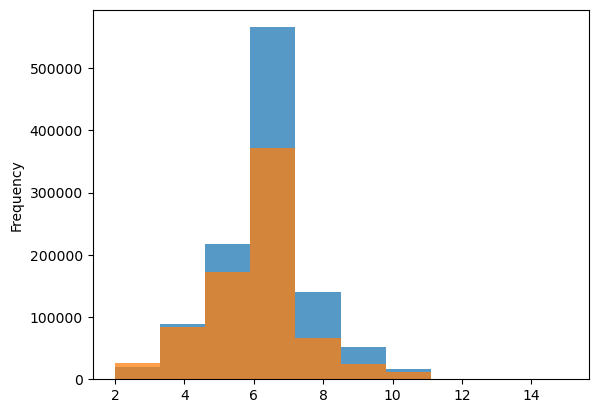

In [172]:
df[df.sex=='F'].name_length.plot(kind='hist',alpha=.75) # blue bars
df[df.sex=='M'].name_length.plot(kind='hist',alpha=.75) # orange bars


## .groupby()

Grouping and aggregating data is a common operation, especially when we want to make comparison (over time or between groups). Pandas even offers tailord tool  `.groupby()` to facilitate comparison of subsets in a dataframe. [Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/), who wrote an excellent introduction to Pandas, has very helpfully visualized the workflow: 

![grouby](https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png)

Following the previous example, **keys** are the values in the `sex` columns, and **data** is the length of each name.

In generally you can think of the syntax as:

```python
df.groupby(key)[value].operation()
```

In [174]:
# we split th
df.groupby('sex')['name_length'].mean()

sex
F    6.298051
M    5.993377
Name: name_length, dtype: float64

### ✏️ Exercise.

Let's analyse the relation between genre and title length.
- add a column to `df_muse` that records number of characters
- optional: can you also add a column that counts the number of words in song title
- group the dataframe by genre and compute the average title length


In [180]:
# write your answer here

### ✏️ Exercise (more difficult version).

Let's analyse the relation between genre and title length.
- add a column to `df_muse` that records number of characters
- use `value_counts()` to obtain the 20 most frequent genres
- create a mask to retrieve only songs from these most popular genres
- groub the dataframe by genre and compute the average title length
- optional: plot the results as a barplot

In [113]:
# write your answer here

## Trends over time

We can also use `.groupby()` to study trends over time. 

In [181]:
df['end-n'] = df.name.str.endswith('n')

In [182]:
df['end-n']

0          False
1          False
2          False
3          False
4          False
           ...  
1858431    False
1858432    False
1858433    False
1858434    False
1858435    False
Name: end-n, Length: 1858436, dtype: bool

<Axes: xlabel='year'>

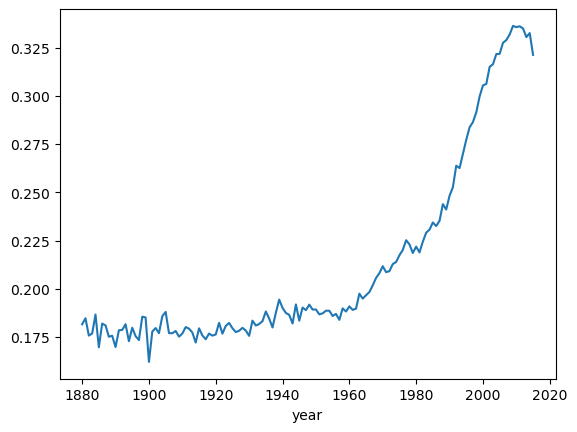

In [183]:
df[df.sex=='M'].groupby('year')['end-n'].mean().plot()

### ✏️ Exercise

Adapt the preceding code. On average, are palindromes becoming more or less common over time?

In [184]:
# write your answer here

# Fin.

# Appendix: Advanced Topics

## Explicit and Implicit indexing

In [ ]:
# let's make a toy dataframe
mock_df = pd.DataFrame([[1,4,6],
                        [2,3,5],
                        [0,9,6],
                        [7,8,9]], 
                       columns= ['c1','c2','c3'], 
                       index=['r1','r2','r3','r4'])
mock_df

A dataframe has an **explicit** index, which are the **row names**, i.e. "r1", "r2" etc). With `.loc` we can access rows by their explicit index (also using **slice** notation!)

In [ ]:
mock_df.loc['r2']

In [ ]:
# slice notation, notice I am not using numbers here!
mock_df.loc['r2':"r4"]

The **implicit** index is the Python-style position-wise index, which looks similar to lists and starts at 0! We can retrieve rows by their position using `.iloc`.

In [ ]:
mock_df.iloc[0]

In [ ]:
# notice that this is different to mock_df.loc['r2':"r4"]
mock_df.iloc[1:3]

For our main `df` using `iloc` or `loc` doesn't make a difference when we want to access just one specific row.

In [ ]:
df.iloc[3]

In [ ]:
df.loc[3]

However when using slice notation, `.iloc` and `.loc` do not return exactly the same.

### ✏️ Exercise:

 Get the first five rows with `iloc` and `loc`.

In [ ]:
# write your answer here

## Advanced: "Fancy" Indexing

To retrieve multiple columns, you can use so-called **'fancy' indexing** by passing column names as a list or an array. (Often we do not need all the data!)

In [ ]:
df.loc[:,['name','sex']]

In [ ]:
# or simpler
df[['sex','name']]

In [ ]:
# you can apply fancy indexing to both rows and columns!
# cool, no?!
df.loc[[3,5],['name','sex']]

In [ ]:
# you can combine multiple indexing strategies, i.e. slicing and fancy indexing
df.loc[3:5,['name','sex']]

In [ ]:
df_muse_by_genre.loc['rap',['track','artist']]

## Hierarchical Index

In [ ]:
by_dec_sex = df.groupby(['year','sex'])['name_length'].mean()
by_dec_sex

In [ ]:
by_dec_sex.loc[1880:1885]

In [ ]:
# get all female names between 1880 and 1888
by_dec_sex.loc[1880:1885,'F']

In [ ]:
# you can plot the average name length by year
by_dec_sex.loc[:,'F'].plot()
by_dec_sex.loc[:,'M'].plot()

In [ ]:
# a more elegant way is to use unstack
by_dec_sex.unstack().plot()

In [ ]:
# just FYI you can apply multiple aggregations at once
df.groupby(['year','sex'])['name_length'].agg(['min','max','mean','median'])

## Apply and lambda functions

String method do not always suffice, in this scenario we often use `lambda` function (or a normal one of course) in combination with apply. For example, what names contain no mare than two different characters? In Python we can formulate this as a boolean expression which evaluates if the length of the set of character is small or equal than two:

In [ ]:
name = 'dddffff'
len(set(name)) <= 2

Let's turn this in function. 
Let's turn this into an 

### ✏️ Exercise!

In [ ]:
# enter solution here

In Python, we like to keep the number of lines small. We could write a more concise function using `lambda`.

In [ ]:
twochars = lambda x: len(set(x)) <= 2

 Now we can use the `.apply()` method to the `name` column. The will "apply" (duh) the function we created to each value in the name columns and return a `pd.Series` object.

In [ ]:
df.name.apply(twochars)

In [ ]:
# we can use it as a mask
df[df.name.apply(twochars)]

In [ ]:
# or save the result in a new column
df['two_chars'] = df.name.apply(twochars)

In [ ]:
# and plot results over time
df[df.sex=='M'].groupby('year')['two_chars'].mean().plot()
df[df.sex=='F'].groupby('year')['two_chars'].mean().plot()

### ✏️ Exercise

What about names starting with 'a' and ending with 'e'  have they become more frequent over time? Use a lambda function to answer this question!.

In [ ]:
# write solution here